<h1>Importing necessary libraries:</h1>

In [5]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import utils
from torch import nn
from torch import optim
import torch.nn.functional as F

<h1>Loading MNIST Dataset</h1>

In [6]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))]))
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))]))

<b>-->The data has been loaded into train set and test set above.</b>

<h1>Visualising the Dataset:</h1>

<b>The train dataset contains 60000 images out of which we are displaying 20 randomly selected images.</b>

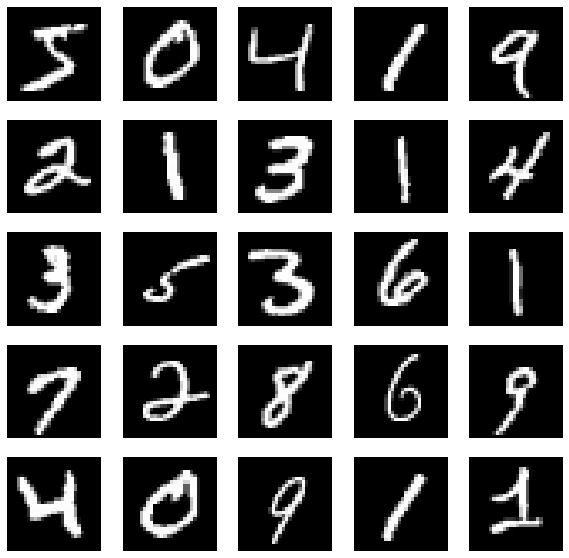

In [7]:
img_no=np.random.permutation(len(mnist_trainset))[:25]
fig = plt.figure(figsize=(10,10))
for i in range(len(img_no)):
    fig.add_subplot(5,5,i+1)
    plt.axis('off')
    x, _ = mnist_trainset[i]
    plt.imshow(x.numpy()[0], cmap='gray')

<h1>Building a 5-Layer Neural network using nn.sequential:</h1>

In [8]:
model=nn.Sequential(nn.Linear(784,1024),nn.ReLU(),nn.Linear(1024,1024),nn.ReLU(),nn.Linear(1024,1024),nn.ReLU(),nn.Linear(1024,1024),nn.ReLU(),nn.Linear(1024,1024),nn.ReLU(),nn.Linear(1024,1024),nn.ReLU(),nn.Linear(1024,10),nn.LogSoftmax(dim=1))
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.008,momentum=0.9)

In [9]:
trainloader=utils.data.DataLoader(mnist_trainset,batch_size=400,shuffle=True)
epochs=35
losses=[]
for i in range(epochs):
    loss_epoch=0
    for images,labels in trainloader:
        images=images.view(images.shape[0],-1)
        optimizer.zero_grad()
        out=model(images)
        loss=criterion(out,labels)
        loss.backward()
        optimizer.step()
        loss_epoch+=loss.item()
    
    else:
        losses.append(loss_epoch/len(trainloader))
        if i%5==0:
            print("Epoch",i,"loss:",loss_epoch/len(trainloader))

Epoch 0 loss: 2.2974418433507284
Epoch 5 loss: 0.20068584670623144
Epoch 10 loss: 0.08240643424292406
Epoch 15 loss: 0.047706800289452074
Epoch 20 loss: 0.028079028567299248
Epoch 25 loss: 0.014007724781986326
Epoch 30 loss: 0.003983189972932451


<b>We have trained the model for above 30 epochs and it has converged.</b>

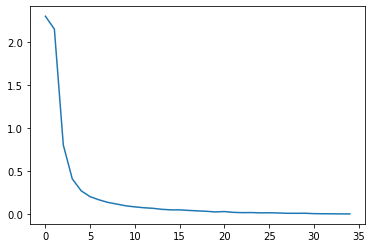

In [10]:
plt.plot(list(range(epochs)),losses)

In [12]:
test_loader=utils.data.DataLoader(mnist_testset,shuffle=True)

In [48]:
correct = 0
imgs=[[] for i in range(10)]
with torch.no_grad():
    for data, target in test_loader:
      data=data.view(data.shape[0],-1)
      outputs=model(data)
      _, predicted = torch.max(outputs,1)
      imgs[int(predicted[0])].append(data)
      if predicted==target:
            correct+=1
print(correct/len(test_loader))

0.9814


<b>We see above that we have achieved an accuracy of 98 percent.</b>

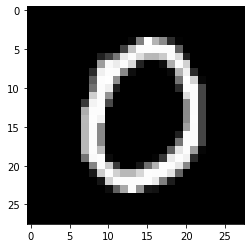

In [65]:
plt.imshow(imgs[0][0].reshape(28,28), cmap='gray')

<h1>Displaying the first 10 classified points of each class in the test data points:</b>

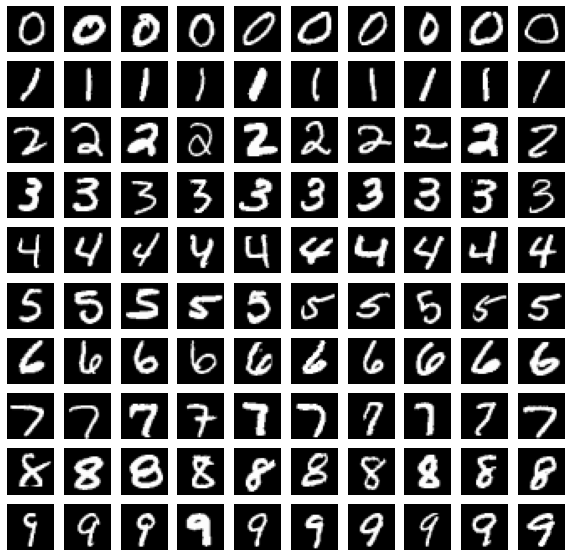

In [67]:
img_no=np.random.permutation(len(mnist_trainset))[:25]
fig = plt.figure(figsize=(10,10))
a=1
for j in range(10):
 for i in range(10):
    fig.add_subplot(10,10,a)
    a+=1
    plt.axis('off')
    plt.imshow(imgs[j][i].reshape(28,28), cmap='gray')
    

<h1>PCA AND T-SNE</h1>